In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [96]:
#Dataset 불러오기
df = pd.read_csv('Admission_Predict.csv')

In [97]:
#Data 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [98]:
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [99]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [100]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [101]:
df.duplicated().sum()

0

In [102]:
df.drop(['Serial No.'] , axis = 1, inplace=True)

In [103]:
df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


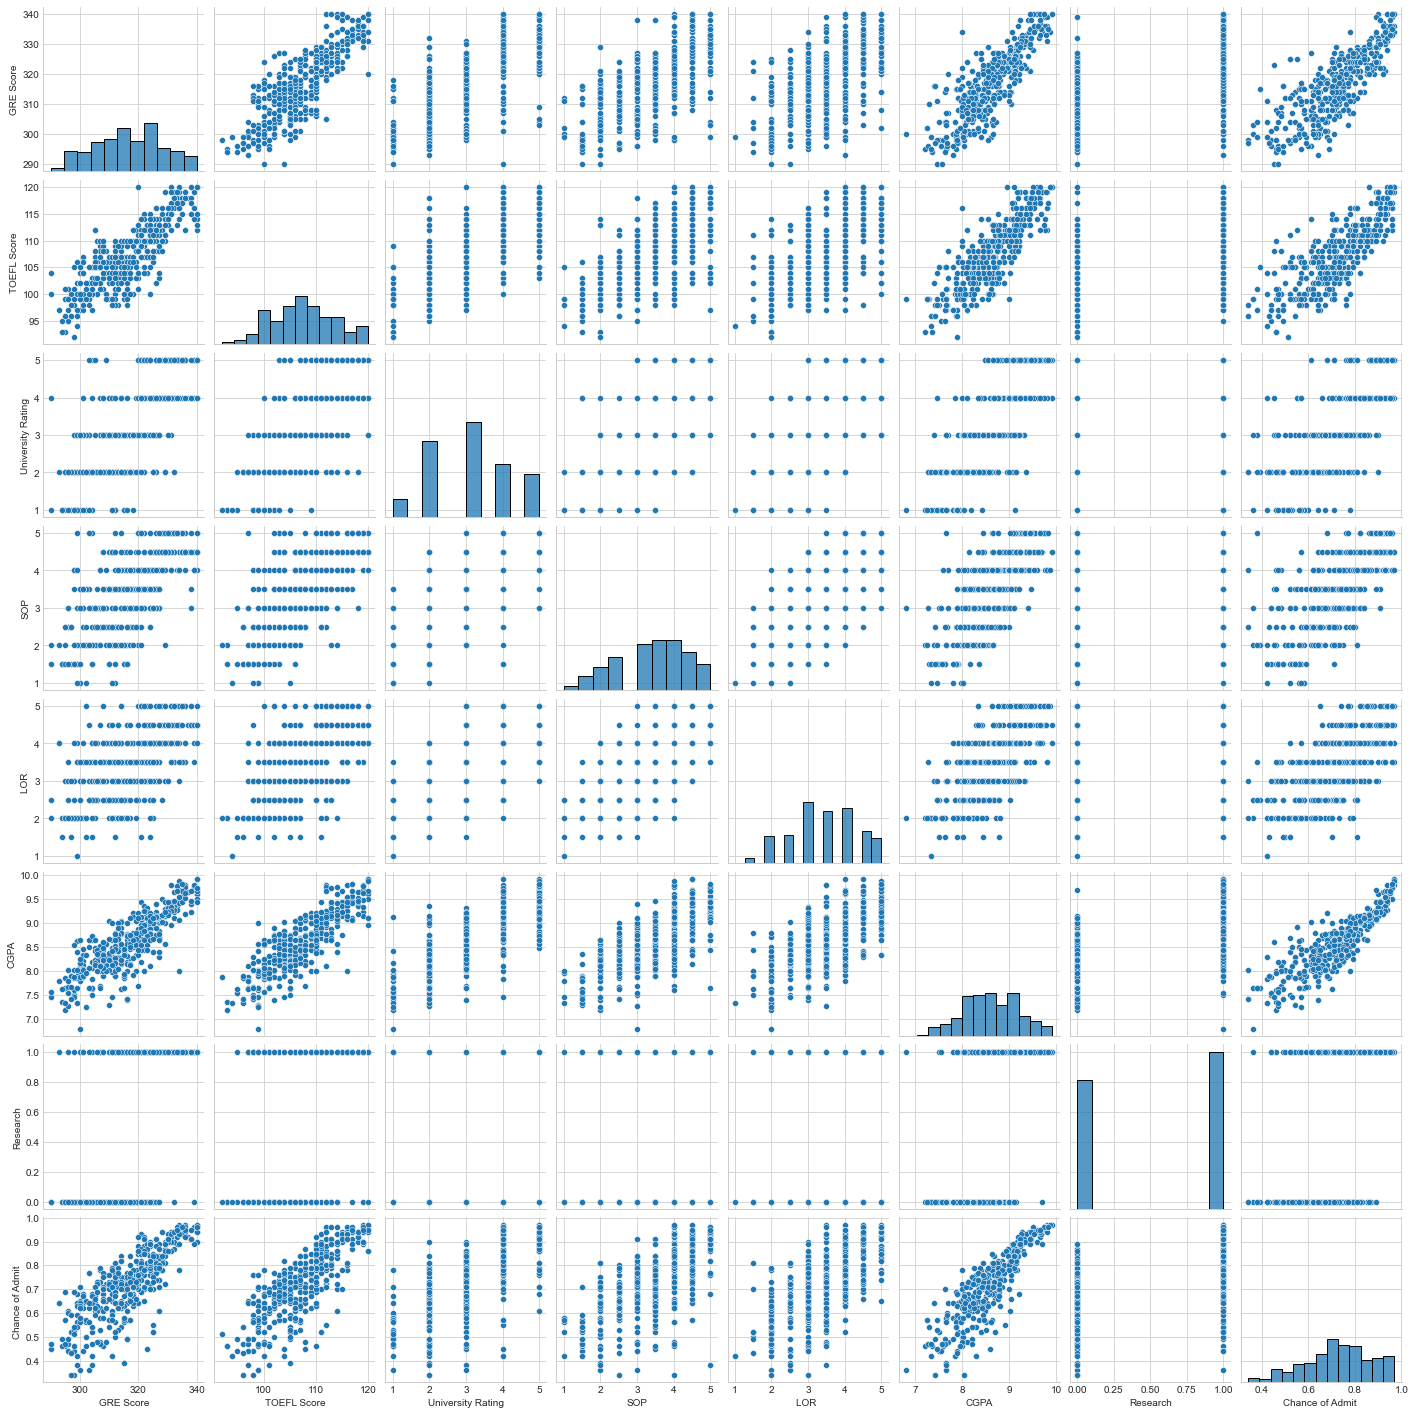

In [104]:
import seaborn as sb
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)
plt.savefig('pairplor.png')

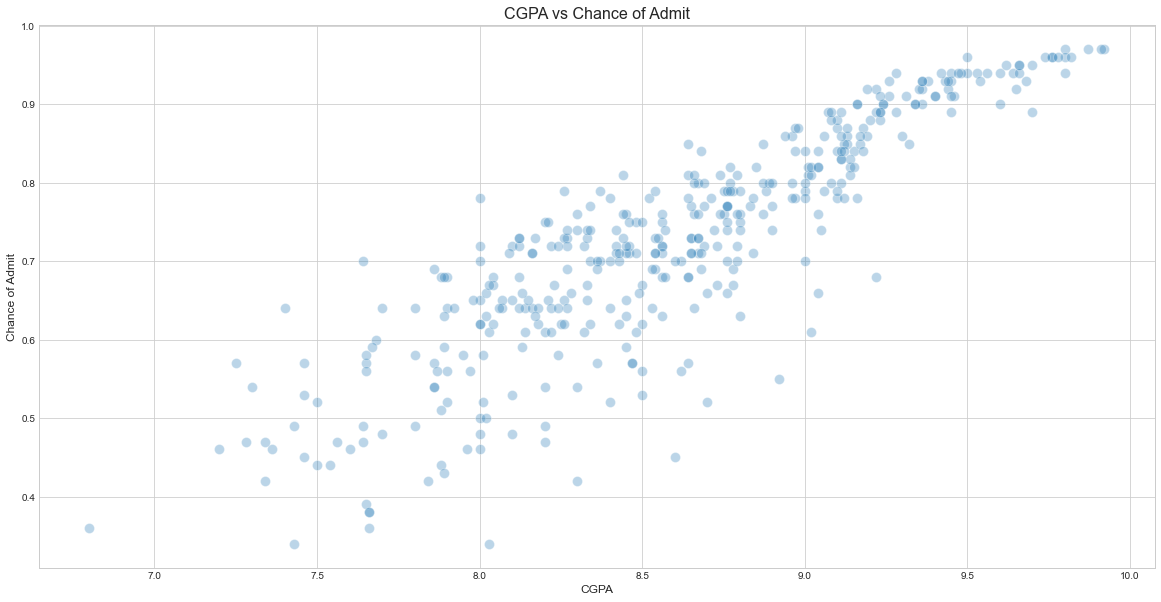

In [105]:
plt.scatter(x = 'CGPA', y = 'Chance of Admit ', data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('CGPA vs Chance of Admit', fontsize = 16)
plt.ylabel('Chance of Admit', fontsize = 12)
plt.xlabel('CGPA', fontsize = 12)

plt.savefig('CGPA_Admit.png')

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_var = df[['GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR ','Research']] # independent variable
y_var = df['Chance of Admit '] # dependent variable
X_scaled = scaler.fit_transform(X_var)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_var, test_size = 0.2, random_state = 42)


In [141]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [142]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

#R-Squared : 0.7390680112472021

0.8212082591486991


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


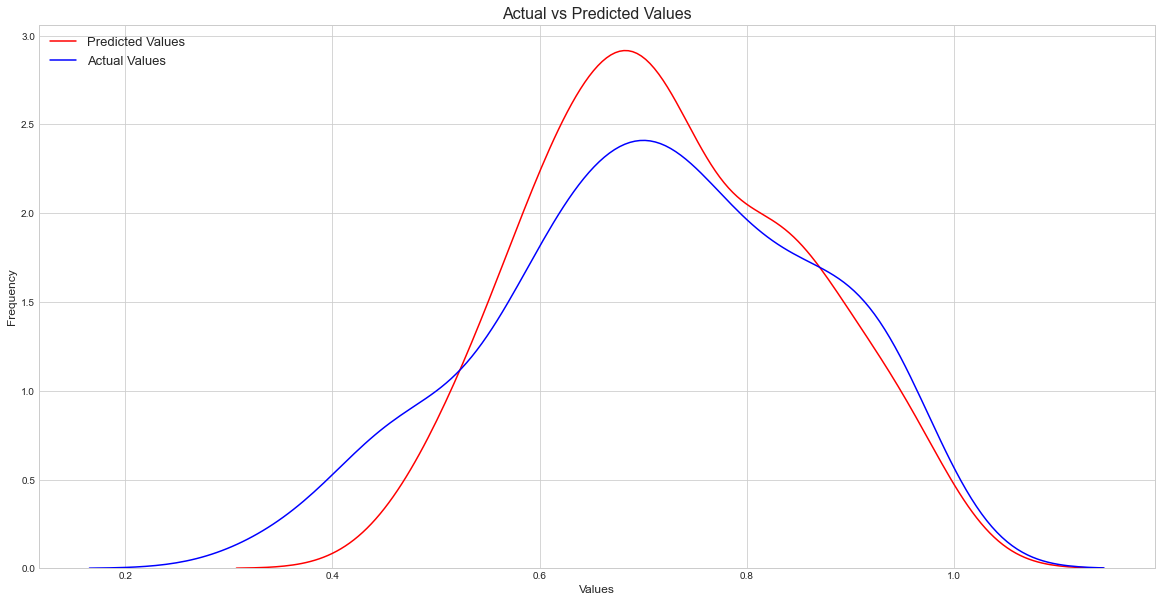

In [138]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

최대일 때 
score : 0.8075391722962293, 36


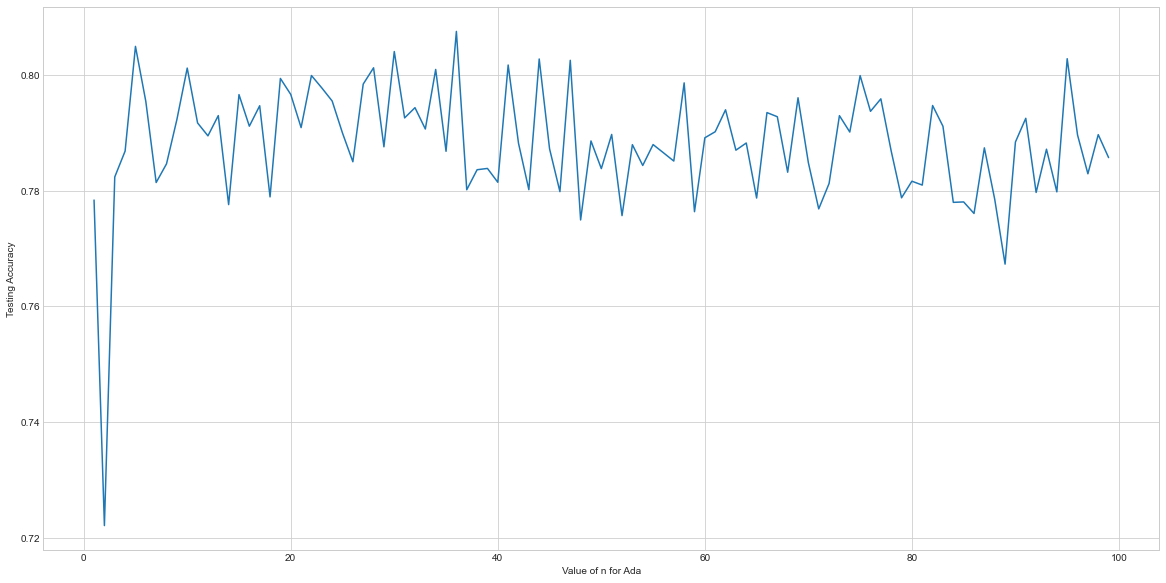

In [143]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

n_range = range(1, 100)
accuracy_scores = []
max = 0
max_n = 0

for n in n_range:
    ada = AdaBoostRegressor(n_estimators = n)
    ada.fit(X_train, y_train)
    yhat = ada.predict(X_test)
    score = r2_score(y_test, yhat)
    accuracy_scores.append(score)
    if max < score:
        max = score
        max_n = n

print(f'최대일 때 \nscore : {max}, {max_n}')

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Ada')
plt.ylabel('Testing Accuracy')
plt.show()

In [122]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

0.6841275666908784


In [36]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

#R-Squared : 0.7167640412742537

0.7167640412742537


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


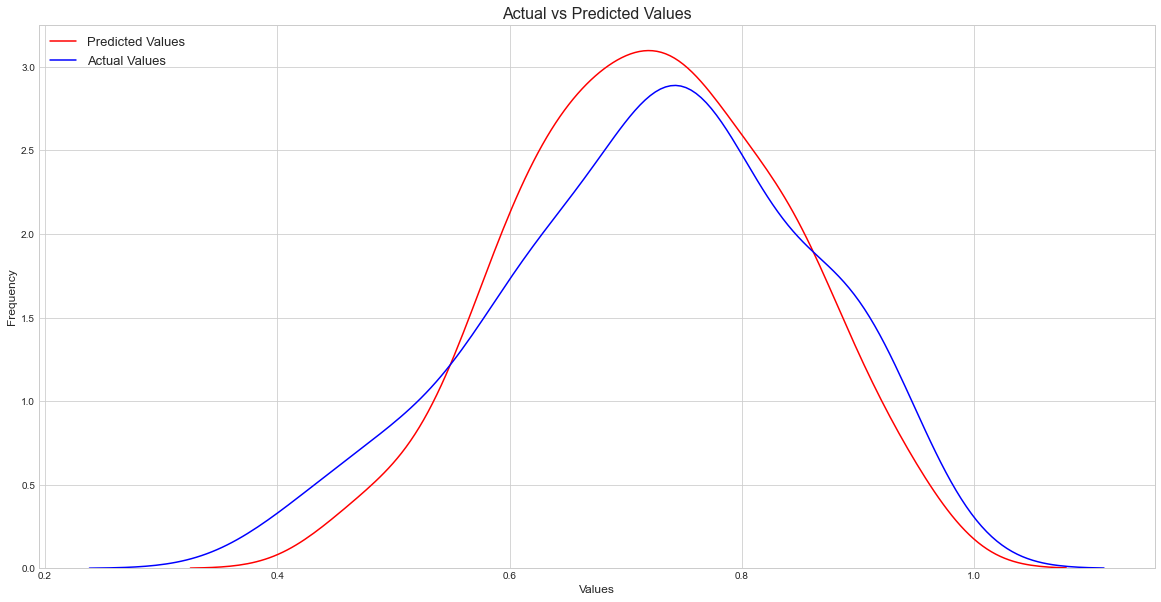

In [37]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

최대일 때 
score : 0.6709143668430662, 7


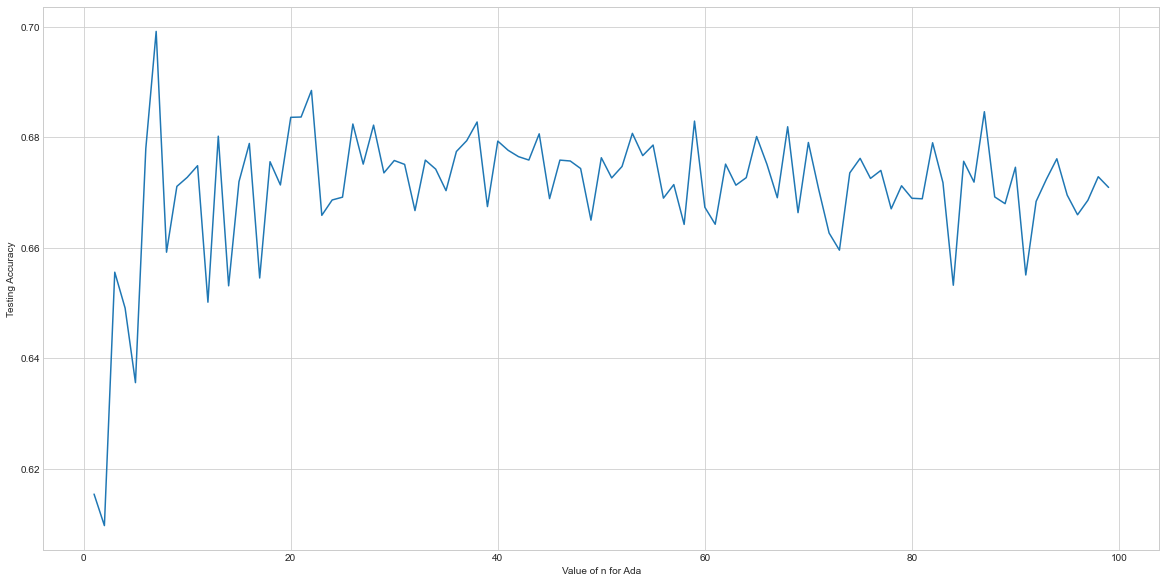

In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

n_range = range(1, 100)
accuracy_scores = []
max = 0
max_n = 0

for n in n_range:
    ada = AdaBoostRegressor(n_estimators = n)
    ada.fit(X_train, y_train)
    yhat = ada.predict(X_test)
    score = r2_score(y_test, yhat)
    accuracy_scores.append(score)
    if max < score:
        max = score
        max_n = n

print(f'최대일 때 \nscore : {score}, {max_n}')

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Ada')
plt.ylabel('Testing Accuracy')
plt.show()

In [54]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 7)
ada.fit(X_train, y_train)
yhat = ada.predict(X_test)

In [55]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

#R-Squared : 0.6772144979330275

0.6651512311777223


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


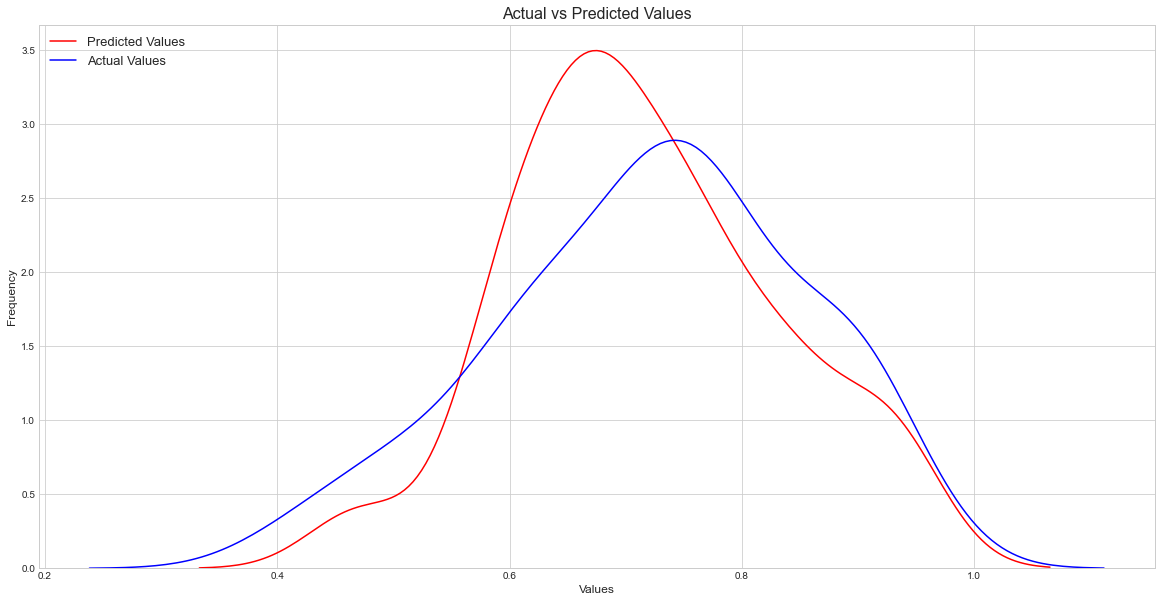

In [56]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

최대일 때 
score : 0.6192588050552246, 62


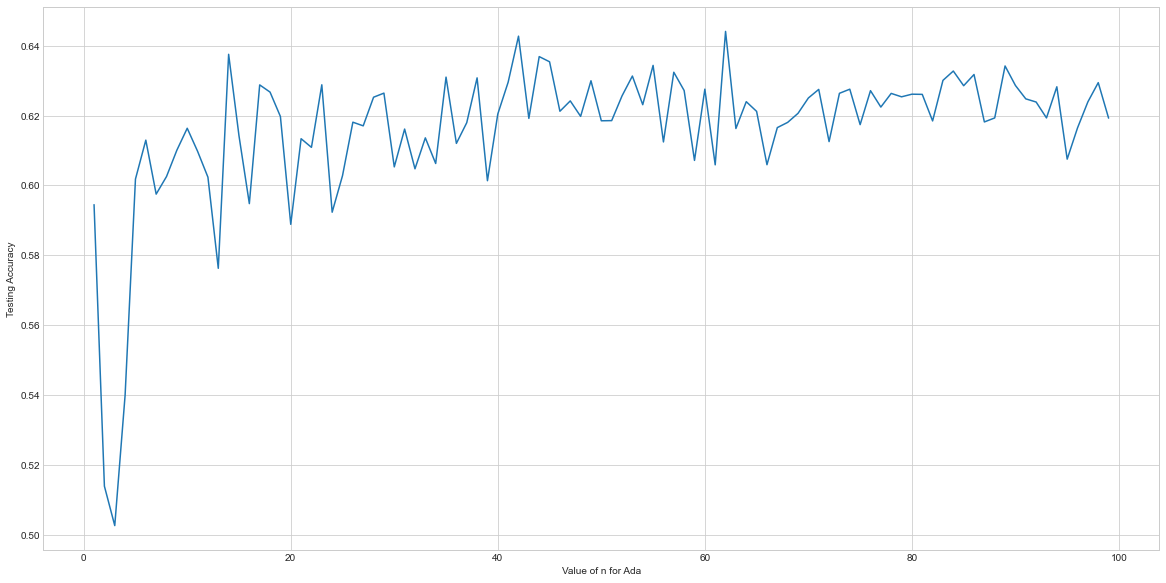

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

n_range = range(1, 100)
accuracy_scores = []
max = 0
max_n = 0

for n in n_range:
    ada = RandomForestRegressor(n_estimators = n)
    ada.fit(X_train, y_train)
    yhat = ada.predict(X_test)
    score = r2_score(y_test, yhat)
    accuracy_scores.append(score)
    if max < score:
        max = score
        max_n = n

print(f'최대일 때 \nscore : {score}, {max_n}')

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Ada')
plt.ylabel('Testing Accuracy')
plt.show()

In [59]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

#R-Squared : 0.9778036067685045


0.6192588050552246


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


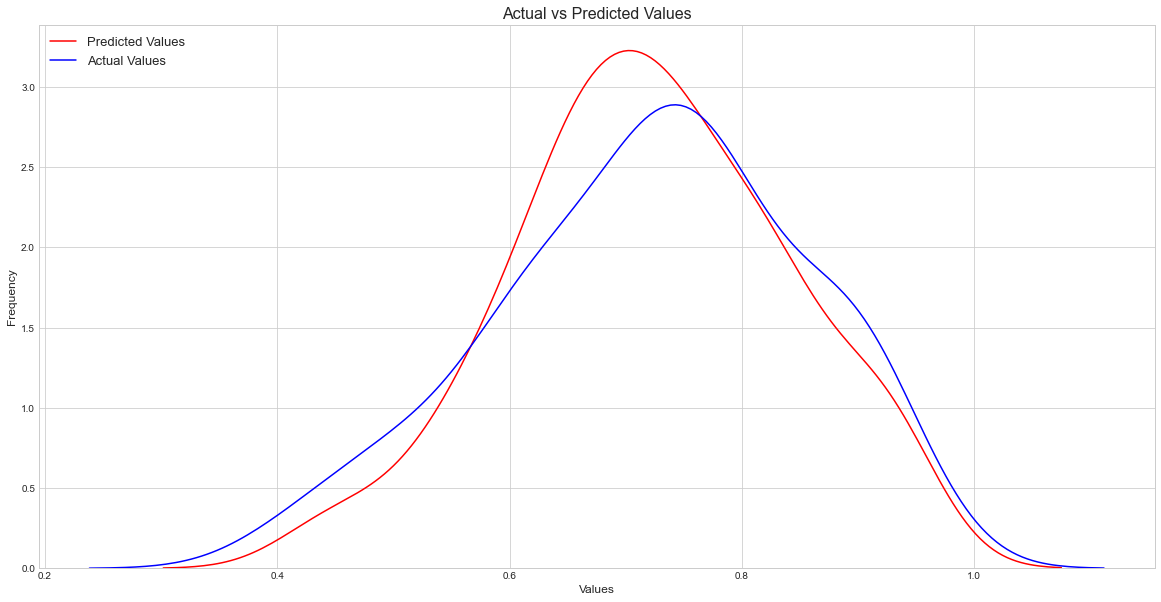

In [49]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [67]:
##Test_size를 0.2로 변경하였다.
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop(['Chance of Admit '], axis=1).values
y = df['Chance of Admit '].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [69]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

#R-Squared : 0.7167640412742537

0.7355078738145218


C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anna0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


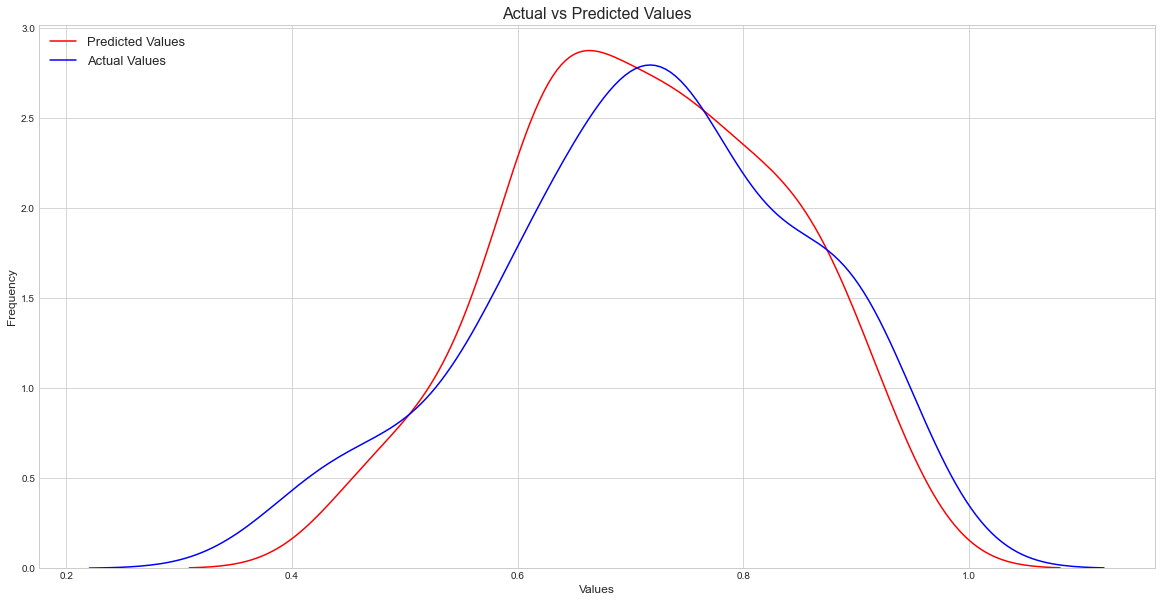

In [70]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

최대일 때 
score : 0.6788602514866031, 25


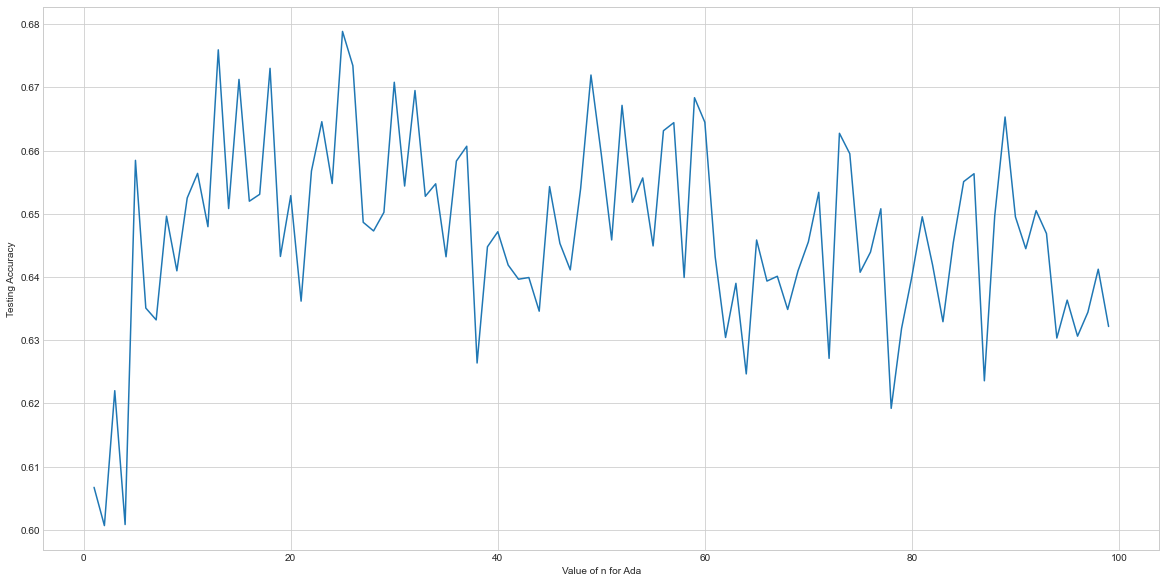

In [78]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

n_range = range(1, 100)
accuracy_scores = []
max = 0
max_n = 0

for n in n_range:
    ada = AdaBoostRegressor(n_estimators = n)
    ada.fit(X_train, y_train)
    yhat = ada.predict(X_test)
    score = r2_score(y_test, yhat)
    accuracy_scores.append(score)
    if max < score:
        max = score
        max_n = n

print(f'최대일 때 \nscore : {max}, {max_n}')

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Ada')
plt.ylabel('Testing Accuracy')
plt.show()

In [76]:
from sklearn.metrics import r2_score

print(r2_score(y_test, yhat))

#R-Squared : 0.9056964162139127

0.6616445394267725
